# Beyond k-means: other clustering algorithms, tools for computation of optimal number of clusters
Try different clustering algorithms (hard and soft). Try to vary the number of clusters manually and then use Weka’s/Python’s facilities to compute the optimal number of clusters. Explore various options that help to improve clustering results. Use visualisation tools for clustering to analyse the results. 

In [1]:
 from Scripts import helperfn as hf
 from Scripts import downsample as ds
 from sklearn.cluster import KMeans 
 from Scripts import plotScripts as ps

 import numpy as np
 import matplotlib.pyplot as plt

 import pandas as pd

In [10]:
X = hf.get_data_noresults()

Y = hf.get_results(-1)
X, Y = hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

# X = ds.downscale(X)
# X = pd.DataFrame(data=X)

X = hf.mutate_to_ewb(X)

#reset index inorder to match cluster indicies for checking what clusters true labels are
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

In [11]:
# 10 clusters due to 10 classes, or 2 because of reuslt datasheet
kmeans = KMeans(n_clusters=10, max_iter=100, random_state=11, algorithm='full').fit(X)

In [12]:
from collections import Counter, defaultdict

def ClusterIndicesNumpy(clustNum, labels_array):
    return np.where(labels_array == clustNum)[0]

cluster = {}

for i in range(len(np.unique(Y))):
    indecies = ClusterIndicesNumpy(i, kmeans.labels_)
    inCluster = Y.to_numpy()[indecies].flatten()

    cluster[i] = Counter(inCluster)
    # print("cluster-", i, "classes:- ", Counter(inCluster))


classes = []
#2d array count of 0 class all clusters
for i in range(len(np.unique(Y))):
    temp = []
    for j in range(len(np.unique(Y))):
        temp.append(cluster[i].get(j,0))
    classes.append(temp)

classes = np.array(classes).T

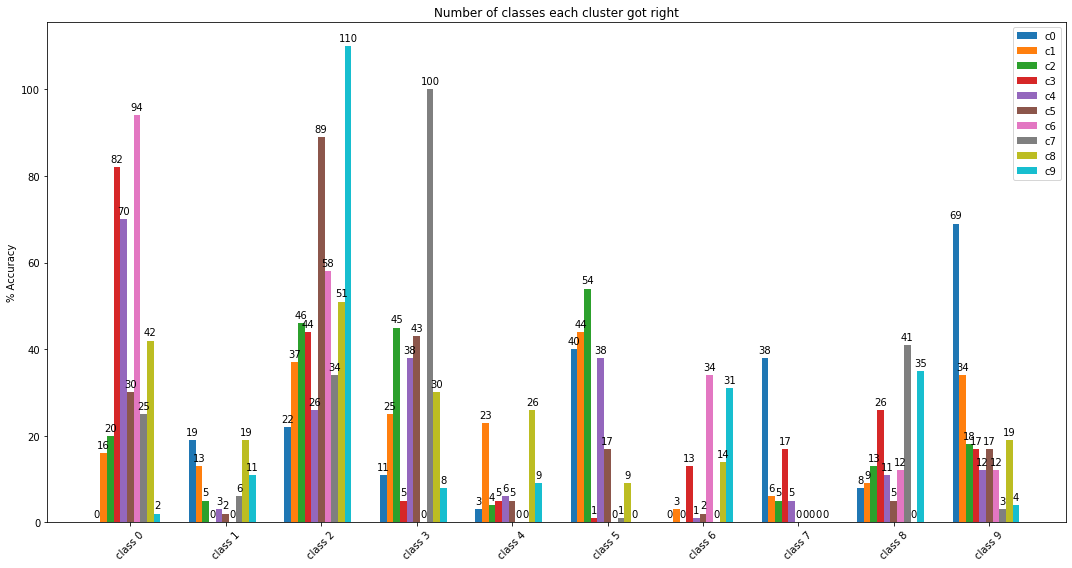

In [13]:
ps.plot_scores(classes, ["c0", "c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9"], title="Number of classes each cluster got right", labels=["class 0", "class 1", "class 2", "class 3", "class 4", "class 5", "class 6", "class 7", "class 8", "class 9"], bar_width=0.07, figure_size=(15, 8))